<a href="https://colab.research.google.com/github/uthours/Data-Processing-Visualization/blob/main/initialviz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Uttam Subedi
#Data Processing Visualization
#Dr. Jacob, ECU

>**Abstract** This part shows the number of covid-19 vaccination given for the top 10 countries. The data is published by informationisbeautiful, it was updated on 04/22/2022.

Here is the link for the visualization I am going to recreate for this project. https://informationisbeautiful.net/visualizations/covid-19-coronavirus-infographic-datapack/#treatments

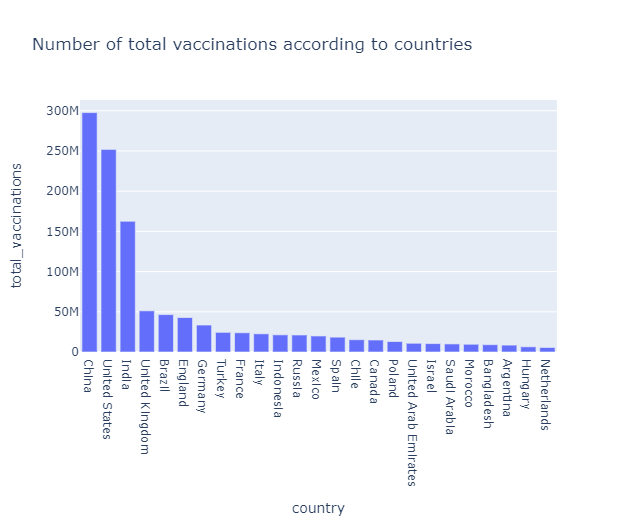

The required libraries:

In [25]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

In [28]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.colors import n_colors
from wordcloud import WordCloud,ImageColorGenerator
init_notebook_mode(connected=True)
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings("ignore")

I wanted to recreat the visualization of vaccination rate of all countries, but it's too complicated. I am using the dataset of US States vaccination from Our World In Data(OWID). It is intresting to me because I live in states. 

In [13]:
df = pd.read_csv('https://raw.githubusercontent.com/uthours/Data-Processing-Visualization/main/country_vaccinations.csv')
df.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/


In [29]:
new_df = df.groupby(["country",'iso_code','vaccines'])['total_vaccinations',
                     'people_vaccinated','people_fully_vaccinated',
                    'daily_vaccinations','total_vaccinations_per_hundred',
                    'people_vaccinated_per_hundred',"people_fully_vaccinated_per_hundred"
,'daily_vaccinations_per_million'].max().reset_index()

# Name of Top 10 vaccine

In [30]:
top10 = new_df['vaccines'].value_counts().nlargest(10)
top10

Oxford/AstraZeneca                                                         20
Johnson&Johnson, Moderna, Oxford/AstraZeneca, Pfizer/BioNTech              17
Moderna, Oxford/AstraZeneca, Pfizer/BioNTech                               15
Oxford/AstraZeneca, Pfizer/BioNTech                                        11
Johnson&Johnson, Moderna, Novavax, Oxford/AstraZeneca, Pfizer/BioNTech      8
Johnson&Johnson, Oxford/AstraZeneca, Sinopharm/Beijing                      7
Pfizer/BioNTech                                                             7
Moderna, Pfizer/BioNTech                                                    6
Johnson&Johnson, Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing     5
Oxford/AstraZeneca, Sinopharm/Beijing                                       5
Name: vaccines, dtype: int64

# Number of total vaccine in different countries

In [34]:
data = new_df[['country','total_vaccinations']].nlargest(25,'total_vaccinations')
fig = px.bar(data, x = 'country',y = 'total_vaccinations',title="Number of total vaccinations according to countries",)
fig.show()

#Refrences:
1. https://github.com/nurfnick/Data_Viz

2. https://www.kaggle.com/datasets/gpreda/covid-world-vaccination-progress?resource
